In [30]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from pathlib import Path
import os
import requests
import urllib
import json

In [2]:
directory = Path(os.getcwd())
data = directory.joinpath('app').joinpath('data')
train = data.joinpath('train')
val = data.joinpath('val')
for i in data, train, val:
    if not i.exists():
        i.mkdir()
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

In [58]:
trainset = datasets.MNIST(train, download=False, train=True, transform=transform)
valset = datasets.MNIST(val, download=False, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=10, shuffle=True)

In [59]:
data_iter = iter(trainloader)

images, labels = data_iter.next()

In [79]:
def get_predictions(imgs):
    imgs = [img.view(1, 28**2).tolist()[0] for img in imgs]
    url = 'http://0.0.0.0:8181/predict'
    req = urllib.request.Request(url)
    req.add_header('Content-Type', 'application/json; charset=utf-8')
    body = json.dumps(imgs)
    body = body.encode('utf-8')
    req.add_header('Content-Length', len(body))
    response = urllib.request.urlopen(req, body)
    return json.loads(response.read())['predictions']

In [81]:
pred = get_predictions(images)
pred

[1, 7, 2, 7, 0, 4, 3, 3, 4, 1]

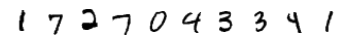

In [89]:
figure = plt.figure()
num_of_images = 10
for index in range(1, num_of_images + 1):
    plt.subplot(1, 10, index)
    plt.axis('off')
    plt.imshow(images[index-1].numpy().squeeze(), cmap='gray_r')